In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets.make_blobs()
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/lbmakanje/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [12]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


Our Model is 86% accurate

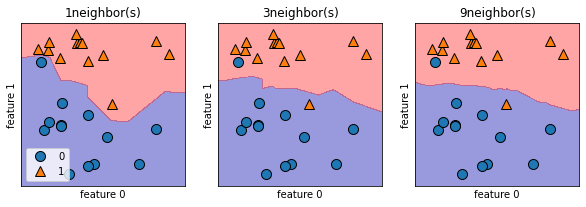

In [14]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill =True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{}neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

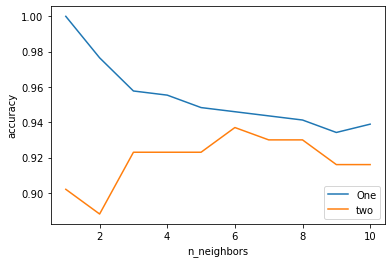

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

test_accuracy = []
training_accuracy = []

neighbor_settings = range(1,11)
for n_neighbors in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbor_settings, training_accuracy, label="One")
plt.plot(neighbor_settings, test_accuracy, label="two")
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(loc=4)